In [2]:
from pydrake.all import *
import sympy as sp

In [3]:
x, y = sp.symbols('x y')

In [4]:
F = 10 - x**2 - y

In [5]:
G = x**2 + y**2 - 1

In [8]:
res = sp.groebner([G], x, y, order='grlex')

In [9]:
res

GroebnerBasis([x**2 + y**2 - 1], x, y, domain='ZZ', order='grlex')

In [29]:
Q = sp.MatrixSymbol('Q', 3, 3)
Q = sp.Matrix(Q)

In [30]:
mx = sp.Matrix([1, x, y])

In [31]:
temp = mx.T@Q@mx

In [32]:
sp.simplify(temp)

Matrix([[x*(x*Q[1, 1] + y*Q[2, 1] + Q[0, 1]) + x*Q[1, 0] + y*(x*Q[1, 2] + y*Q[2, 2] + Q[0, 2]) + y*Q[2, 0] + Q[0, 0]]])

In [79]:
prog = MathematicalProgram()

x = prog.NewIndeterminates(1, 'x')[0]
y = prog.NewIndeterminates(1, 'y')[0]
Q = prog.NewSymmetricContinuousVariables(6, 'Q')

mx = np.hstack([x, y, x**2, x*y, y**2, y*x**2])

expression = Polynomial(mx.T@Q@mx)

original_expression = Polynomial(x**2 + y**2)

prog.AddEqualityConstraintBetweenPolynomials(expression, original_expression)
result = solver.Solve(prog)

In [80]:
result.GetSolution(Q)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [73]:
expression = Polynomial(mx.T@Q@mx)

original_expression = Polynomial(10 - x[0]**2 - y[0])

prog.AddEqualityConstraintBetweenPolynomials(expression, original_expression)
#prog.AddPositiveSemidefiniteConstraint(Q)
solver = MosekSolver()

result = solver.Solve(prog)

TypeError: 'pydrake.symbolic.Variable' object is not subscriptable

In [63]:
result.GetSolution(Q)

array([[10. ,  0. , -0.5],
       [ 0. , -1. ,  0. ],
       [-0.5,  0. ,  0. ]])

In [64]:
mx.T@result.GetSolution(Q)@mx

<Expression "(10 - y(0) - pow(x(0), 2))">

In [65]:
np.linalg.eigvals(result.GetSolution(Q))

array([10.02493781, -0.02493781, -1.        ])

In [68]:
Q_test = np.array([[9, 0, -1/2], [0, 0, 0], [-1/2, 0, 1]])

In [69]:
Polynomial(mx.T@Q_test@mx)

<Polynomial "9*1 + -1*y(0) + 1*y(0)^2">

In [88]:
prog = MathematicalProgram()
S = prog.NewSymmetricContinuousVariables(2, "S")
psd_constraint = prog.AddPositiveSemidefiniteConstraint(S)

#prog.AddBoundingBoxConstraint(1, 1, S[1, 0])
#prog.AddLinearCost(np.trace(S))
result = Solve(prog)

S_value = result.GetSolution(S)

In [89]:
np.linalg.eigvalsh(S_value)

array([0.70710678, 0.70710678])

In [90]:
S_value

array([[0.70710678, 0.        ],
       [0.        , 0.70710678]])

Try Groebner basis for Van der Pol oscillator

In [98]:
x0, x1, xd0, xd1 = sp.symbols('x_0 x_1 xdot_0 xdot_1')
g0 = xd0 + x1
g1 = xd1 - x0 - (x0**2 - 1)*x1

f = [- x1, x0 + (x0**2 - 1) * x1]

V = 1.5*x0**2 + x1**2 - x0*x1
Vdot = sp.Matrix([V]).jacobian(sp.Matrix([x0, x1])).dot(f)

G = [g0, g1, Vdot]

In [118]:
res = sp.groebner(G, x0, xd0, x1, xd1, order='grlex')

In [119]:
res

GroebnerBasis([x_1**5 + 4*x_1**4*xdot_1 + 4*x_1**3*xdot_1**2 - 6*x_1**3 - 8*x_1**2*xdot_1 - 5*x_1*xdot_1**2 - xdot_1**3, 5*x_0*xdot_1**3 + 9*x_1**4 + 33*x_1**3*xdot_1 + 25*x_1**2*xdot_1**2 - 10*x_1*xdot_1**3 - 54*x_1**2 - 54*x_1*xdot_1 - 27*xdot_1**2, 9*x_0**2*xdot_1 + 5*x_0*xdot_1**2 - 3*x_1**3 - 11*x_1**2*xdot_1 - 10*x_1*xdot_1**2 - 27*x_0 + 27*x_1 + 27*xdot_1, 3*x_0*x_1 + x_0*xdot_1 - x_1**2 - 2*x_1*xdot_1, x_1 + xdot_0], x_0, xdot_0, x_1, xdot_1, domain='ZZ', order='grlex')

In [120]:
ahem = list(res)

In [121]:
for element in ahem: 
    print(sp.LT(element, x0, xd0, x1, xd1, order='grlex'))

x_1**5
5*x_0*xdot_1**3
9*x_0**2*xdot_1
3*x_0*x_1
xdot_0


In [122]:
a, b = sp.symbols('a b')

In [180]:
import sympy as sp
import numpy as np

In [361]:
def find_support(f, Supp): 
    terms_f = f.terms()
    for term in terms_f:
        Supp.append(term[0])
    return Supp
# define the variables
x, y = sp.symbols('x y')

#define the max term (upper bound)
max_x = 12
max_y = 0
max_term = x**max_x*y**max_y

# define the polynomail f
f = sp.Poly(-x**3, (x, y))
    
#define the ideal and find the Groebner basis
I = [x**3 + y**6, x**2 - y**5]
G = sp.groebner(I, x, y, order='grlex')
G = list(G)

#finding the support of f 
f_bar = sp.reduced(f, G)[1]
Supp = []
Supp = find_support(f_bar, Supp)

#define x and y degree matrices for looping 
x_deg = np.linspace(0, 15, 16)
y_deg = np.linspace(0, 15, 16)

x_deg, y_deg = np.meshgrid(x_deg, y_deg)

# for g in G: 
#     b1 = 3
#     b2 = 3
#     curr_term = x**b1*y**b2
#     print(curr_term)
#     comp_poly = sp.Poly(curr_term+max_term, (x, y))
#     comp_LT = sp.LT(comp_poly, order='grlex')
#     if comp_LT-max_term == 0: 
#         print('HERE')
#         check_poly = sp.Poly(curr_term*g, (x, y))
#         new_LT = sp.LT(check_poly, order='grlex')
#         comp_poly = sp.Poly(new_LT+max_term, (x, y))
#         comp_LT = sp.LT(comp_poly, order='grlex')
#         if comp_LT-max_term==0: 
#             print('HERE')
#             Supp = find_support(check_poly, Supp)
            
for g in G: 
    for i in range(len(x_deg)): 
        for j in range(len(y_deg)): 
            b1 = int(x_deg[i, j])
            b2 = int(y_deg[i, j])
            curr_term = x**b1*y**b2
            comp_poly = sp.Poly(curr_term+max_term, (x, y))
            comp_LT = sp.LT(comp_poly, order='grlex')
            if comp_LT-max_term == 0 or max_x+max_y==b1+b2: 
                check_poly = sp.Poly(curr_term*g, (x, y))
                new_LT = sp.LT(check_poly, order='grlex')
                comp_poly = sp.Poly(new_LT+max_term, (x, y))
                comp_LT = sp.LT(comp_poly, order='grlex')
                if comp_LT-max_term==0 or sum(sp.degree_list(new_LT))==max_x+max_y: 
                    Supp = find_support(check_poly, Supp)


In [362]:
Supp

[(1, 5),
 (2, 0),
 (0, 5),
 (3, 0),
 (1, 5),
 (4, 0),
 (2, 5),
 (5, 0),
 (3, 5),
 (6, 0),
 (4, 5),
 (7, 0),
 (5, 5),
 (8, 0),
 (6, 5),
 (9, 0),
 (7, 5),
 (2, 1),
 (0, 6),
 (3, 1),
 (1, 6),
 (4, 1),
 (2, 6),
 (5, 1),
 (3, 6),
 (6, 1),
 (4, 6),
 (7, 1),
 (5, 6),
 (8, 1),
 (6, 6),
 (2, 2),
 (0, 7),
 (3, 2),
 (1, 7),
 (4, 2),
 (2, 7),
 (5, 2),
 (3, 7),
 (6, 2),
 (4, 7),
 (7, 2),
 (5, 7),
 (2, 3),
 (0, 8),
 (3, 3),
 (1, 8),
 (4, 3),
 (2, 8),
 (5, 3),
 (3, 8),
 (6, 3),
 (4, 8),
 (2, 4),
 (0, 9),
 (3, 4),
 (1, 9),
 (4, 4),
 (2, 9),
 (5, 4),
 (3, 9),
 (2, 5),
 (0, 10),
 (3, 5),
 (1, 10),
 (4, 5),
 (2, 10),
 (2, 6),
 (0, 11),
 (3, 6),
 (1, 11),
 (2, 7),
 (0, 12),
 (3, 0),
 (2, 1),
 (4, 0),
 (3, 1),
 (5, 0),
 (4, 1),
 (6, 0),
 (5, 1),
 (7, 0),
 (6, 1),
 (8, 0),
 (7, 1),
 (9, 0),
 (8, 1),
 (10, 0),
 (9, 1),
 (11, 0),
 (10, 1),
 (12, 0),
 (11, 1),
 (3, 1),
 (2, 2),
 (4, 1),
 (3, 2),
 (5, 1),
 (4, 2),
 (6, 1),
 (5, 2),
 (7, 1),
 (6, 2),
 (8, 1),
 (7, 2),
 (9, 1),
 (8, 2),
 (10, 1),
 (9, 2),
 (11, 1

In [363]:
xs = []
ys = []
for elem in Supp: 
    xs.append(elem[0])
    ys.append(elem[1])

In [364]:
points = np.array([xs, ys]).T

In [366]:
np.shape(points)

(183, 2)

In [367]:
points_new = points/2

In [368]:
import scipy.spatial

In [369]:
points_new

array([[0.5, 2.5],
       [1. , 0. ],
       [0. , 2.5],
       [1.5, 0. ],
       [0.5, 2.5],
       [2. , 0. ],
       [1. , 2.5],
       [2.5, 0. ],
       [1.5, 2.5],
       [3. , 0. ],
       [2. , 2.5],
       [3.5, 0. ],
       [2.5, 2.5],
       [4. , 0. ],
       [3. , 2.5],
       [4.5, 0. ],
       [3.5, 2.5],
       [1. , 0.5],
       [0. , 3. ],
       [1.5, 0.5],
       [0.5, 3. ],
       [2. , 0.5],
       [1. , 3. ],
       [2.5, 0.5],
       [1.5, 3. ],
       [3. , 0.5],
       [2. , 3. ],
       [3.5, 0.5],
       [2.5, 3. ],
       [4. , 0.5],
       [3. , 3. ],
       [1. , 1. ],
       [0. , 3.5],
       [1.5, 1. ],
       [0.5, 3.5],
       [2. , 1. ],
       [1. , 3.5],
       [2.5, 1. ],
       [1.5, 3.5],
       [3. , 1. ],
       [2. , 3.5],
       [3.5, 1. ],
       [2.5, 3.5],
       [1. , 1.5],
       [0. , 4. ],
       [1.5, 1.5],
       [0.5, 4. ],
       [2. , 1.5],
       [1. , 4. ],
       [2.5, 1.5],
       [1.5, 4. ],
       [3. , 1.5],
       [2. ,

In [370]:
conv_points = []
for point in points_new: 
    print(len(point))
    int_point = np.array(point, dtype='int')
    compare = int_point == point
    print(int_point)
    print(point)
    print(compare)
    if sum(compare) == len(point): 
        conv_points.append(point)
conv_points = np.array(conv_points)

2
[0 2]
[0.5 2.5]
[False False]
2
[1 0]
[1. 0.]
[ True  True]
2
[0 2]
[0.  2.5]
[ True False]
2
[1 0]
[1.5 0. ]
[False  True]
2
[0 2]
[0.5 2.5]
[False False]
2
[2 0]
[2. 0.]
[ True  True]
2
[1 2]
[1.  2.5]
[ True False]
2
[2 0]
[2.5 0. ]
[False  True]
2
[1 2]
[1.5 2.5]
[False False]
2
[3 0]
[3. 0.]
[ True  True]
2
[2 2]
[2.  2.5]
[ True False]
2
[3 0]
[3.5 0. ]
[False  True]
2
[2 2]
[2.5 2.5]
[False False]
2
[4 0]
[4. 0.]
[ True  True]
2
[3 2]
[3.  2.5]
[ True False]
2
[4 0]
[4.5 0. ]
[False  True]
2
[3 2]
[3.5 2.5]
[False False]
2
[1 0]
[1.  0.5]
[ True False]
2
[0 3]
[0. 3.]
[ True  True]
2
[1 0]
[1.5 0.5]
[False False]
2
[0 3]
[0.5 3. ]
[False  True]
2
[2 0]
[2.  0.5]
[ True False]
2
[1 3]
[1. 3.]
[ True  True]
2
[2 0]
[2.5 0.5]
[False False]
2
[1 3]
[1.5 3. ]
[False  True]
2
[3 0]
[3.  0.5]
[ True False]
2
[2 3]
[2. 3.]
[ True  True]
2
[3 0]
[3.5 0.5]
[False False]
2
[2 3]
[2.5 3. ]
[False  True]
2
[4 0]
[4.  0.5]
[ True False]
2
[3 3]
[3. 3.]
[ True  True]
2
[1 1]
[1. 1.]
[ True  

array([[0., 1.],
       [0., 1.],
       [2., 0.],
       [1., 1.],
       [3., 0.],
       [2., 1.],
       [4., 0.],
       [0., 2.],
       [2., 1.],
       [1., 2.],
       [3., 1.],
       [0., 3.],
       [2., 2.]])

In [371]:
hull = scipy.spatial.ConvexHull(conv_points)

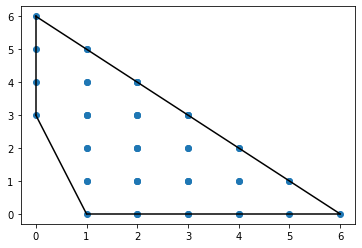

In [378]:
import matplotlib.pyplot as plt

plt.plot(conv_points[:,0], conv_points[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(conv_points[simplex, 0], conv_points[simplex, 1], 'k-')

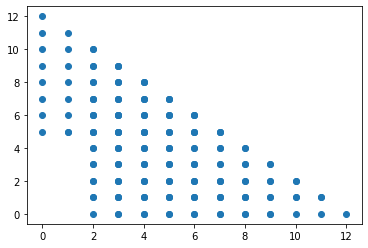

In [373]:
plt.scatter(xs, ys)

In [401]:
Nupp = []
for point in conv_points: 
    b1 = int(point[0])
    b2 = int(point[1])
    
    monomial = sp.Poly(x**b1*y**b2, (x, y))
    print(monomial)
    monomial_bar = sp.reduced(monomial, G, order='grlex')[1]
    print(monomial_bar)
    Nupp = find_support(monomial_bar, Nupp)

Poly(x, x, y, domain='ZZ')
Poly(x, x, y, domain='ZZ')
Poly(x**2, x, y, domain='ZZ')
Poly(x**2, x, y, domain='ZZ')
Poly(x**3, x, y, domain='ZZ')
Poly(-x**2*y, x, y, domain='ZZ')
Poly(x**4, x, y, domain='ZZ')
Poly(x**2*y**2, x, y, domain='ZZ')
Poly(y**3, x, y, domain='ZZ')
Poly(y**3, x, y, domain='ZZ')
Poly(x*y**3, x, y, domain='ZZ')
Poly(x*y**3, x, y, domain='ZZ')
Poly(x**2*y**3, x, y, domain='ZZ')
Poly(x**2*y**3, x, y, domain='ZZ')
Poly(x**3*y**3, x, y, domain='ZZ')
Poly(-x**2*y**4, x, y, domain='ZZ')
Poly(x*y, x, y, domain='ZZ')
Poly(x*y, x, y, domain='ZZ')
Poly(x**2*y, x, y, domain='ZZ')
Poly(x**2*y, x, y, domain='ZZ')
Poly(x**3*y, x, y, domain='ZZ')
Poly(-x**2*y**2, x, y, domain='ZZ')
Poly(y**4, x, y, domain='ZZ')
Poly(y**4, x, y, domain='ZZ')
Poly(x*y**4, x, y, domain='ZZ')
Poly(x*y**4, x, y, domain='ZZ')
Poly(x**2*y**4, x, y, domain='ZZ')
Poly(x**2*y**4, x, y, domain='ZZ')
Poly(x*y**2, x, y, domain='ZZ')
Poly(x*y**2, x, y, domain='ZZ')
Poly(x**2*y**2, x, y, domain='ZZ')
Poly(x**2*

In [393]:
sp.reduced(-x*y**5, G)

([0, 0], -x*y**5)

In [389]:
G

[-x**2 + y**5, x**3 + x**2*y]

In [375]:
Nupp

[(1, 0),
 (0, 5),
 (1, 5),
 (0, 10),
 (0, 3),
 (1, 3),
 (0, 8),
 (1, 8),
 (1, 1),
 (0, 6),
 (1, 6),
 (0, 4),
 (1, 4),
 (0, 9),
 (1, 2),
 (0, 7),
 (0, 5),
 (1, 5),
 (1, 3),
 (0, 6),
 (0, 5),
 (1, 5),
 (0, 10),
 (1, 10),
 (0, 15),
 (1, 1),
 (0, 6),
 (1, 6),
 (0, 11),
 (1, 11),
 (0, 6),
 (1, 6),
 (0, 11),
 (1, 11),
 (1, 2),
 (0, 7),
 (1, 7),
 (0, 12),
 (0, 7),
 (1, 7),
 (0, 12),
 (1, 3),
 (0, 8),
 (1, 8),
 (0, 8),
 (1, 8),
 (1, 4),
 (0, 9),
 (0, 9),
 (1, 5)]

In [402]:
xns = []
yns = []
for elem in Nupp: 
    xns.append(elem[0])
    yns.append(elem[1])

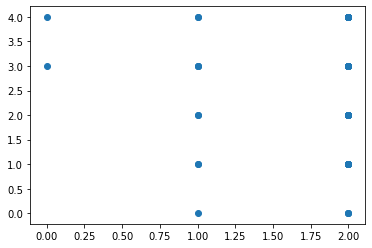

In [403]:
plt.scatter(xns, yns)

In [398]:
sp.reduced(x**3, G, order='grlex')

([0, 1], -x**2*y)

In [249]:
sp.reduced(f, G)[1]

Poly(-x*y**2 + y**2, x, y, domain='ZZ')

In [268]:
sum(sp.degree_list(x**2*y))

3

In [219]:
curr_term = x**4*y**4
print(curr_term)
comp_poly = sp.Poly(curr_term+max_term, (y, x))
comp_LT = sp.LT(comp_poly, order='grlex')

x**4*y**4


In [220]:
comp_LT

y**8

In [131]:
import numpy as np

In [135]:
x_deg = np.linspace(0, 10, 11)
y_deg = np.linspace(0, 10, 11)

x_deg, y_deg = np.meshgrid(x_deg, y_deg)

In [143]:
x_max = 0
y_max = 3

In [ ]:
# finding the support of a polynomial f

In [179]:
max_term = x**x_max*y**y_max
for i in range(len(x_deg)): 
    for j in range(len(y_deg)): 
        b1 = int(x_deg[i, j])
        b2 = int(y_deg[i, j])
        curr_term = x**b1*y**b2
        comp_poly = sp.Poly(curr_term+max_term, (x, y))
        comp_LT = sp.LT(comp_poly, order='grlex')
        if comp_LT - max_term == 0: 
            print(curr_term)

1
x
x**2
y
x*y
y**2


In [172]:
x1, x2 = sp.symbols('x_1 x_2')

In [177]:
fff = sp.Poly(x1**2 + x2**2, (x2, x1))

In [178]:
sp.LT(fff, order='lex')

x_2**2

In [175]:
fff = sp.Poly(x1**2 + x2**2)

In [176]:
sp.LT(fff, order='grevlex')

x_1**2

In [ ]:
fff = sp.Poly(x1**2 + x2**2, (x2, x1))